라이브러리 호출

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


샘플데이터 생성함수

In [2]:
def make_sample(data, window):
    train = []					# 공백 리스트 생성
    target = []
    for i in range(len(data)-window):		# 데이터의 길이만큼 반복
        train.append(data[i:i+window])		# i부터 (i+window-1) 까지를 저장
        target.append(data[i+window])		# (i+window) 번째 요소는 정답
    return np.array(train), np.array(target)	# 파이썬 리스트를 넘파이로 변환


샘플데이터 생성

In [3]:
seq_data = []
for i in np.arange(0, 1000):
    seq_data += [[np.sin( np.pi * i* 0.01 )]]
X, y = make_sample(seq_data, 10)		# 윈도우 크기=10


모델 작성

In [4]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')


학습

In [5]:
history = model.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
31/31 [==============================] - 1s 4ms/step - loss: 0.1331
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0484
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0391
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0294
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0194
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0123
Epoch 8/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0096
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0076
Epoch 11/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 12/100
31/31 [==============================] - 0s 4ms/step - loss: 0.0063
Epoch 13/100
31/31 [=================

Loss값 추이 보기

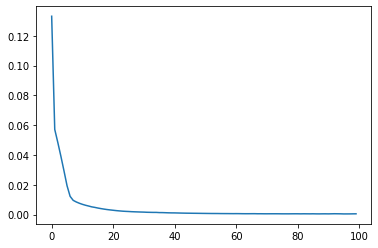

In [6]:
plt.plot(history.history['loss'], label="loss")
plt.show()

테스트 샘플 생성

In [7]:
seq_data = []
for i in np.arange(0, 1000):			# 테스트 샘플 생성
    seq_data += [[np.cos( np.pi * i* 0.01 )]]
X, y = make_sample(seq_data, 10)		# 윈도우 크기=10


예측값 보기

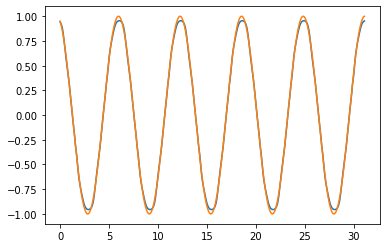

In [8]:
y_pred = model.predict(X, verbose=0)		# 테스트 예측값

plt.plot(np.pi * np.arange(0, 990)*0.01, y_pred )
plt.plot(np.pi * np.arange(0, 990)*0.01, y)
plt.show()
